# Tasks 2020

December 18th 2020

Eoin Lees - Student Number

--------------

These are my solutions to the Tasks assesments.

------------

In [21]:
# Import Functions

import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sklearn.neighbors as nei
import sklearn.model_selection as mod

## Task 1: Calculate square root


----


We can calculate the square root of a number by using Newton's method. [1,2]

To find the square root of $z$ of a number $x$, we can iterate using the following equation. 

$$ z_{next} = z - \frac{z^2 - x}{2z} $$


# Explain how this works and reference



In [2]:
# A function to calculate the square root of number x
def sqrt(x):
    '''
    A function to calculate the square root of number x
    '''
    # Initial guess for square root z
    z = x / 2
    # Loop until accuracy is ok
    while abs(x - (z*z)) > 0.00001:
         z -= (z*z - x) / (2*z)
    # Return the approximate square root of x. 
    return z



##### Tests of the function

The function was tested with some known values. 

In [3]:
# Test the function on 100.
sqrt(100)

10.000000000107446

In [4]:
# Test the function on 2.
sqrt(2)

1.4142156862745099

In [5]:
# Test with imported function
import math
math.sqrt(2)

1.4142135623730951

References

This is a markdown cell [1]

[1] Mastering Markdown; GitHub; https://guides.github.com/features/mastering-markdown/

[2] Python Tutorial; Python Software Foundation; https://docs.python.org/3/tutorial/controlflow.html#for-statements

[3] Methods of computing square roots; Wikipedia; https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[4] https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64

[5] A tour of go; Exercise: Loops and Functions; https://tour.golang.com/flowcontrol/8

[6] Newton's method; Wikipedia; https://en.wikipedia.org/wiki/Newton%27s_method

[7] https://www.mathjax.org/

###### Assignment 2

[8] https://www.youtube.com/watch?v=ICXR9nDbudk&ab_channel=JieJenn]

[9] https://stackoverflow.com/questions/50355577/scraping-wikipedia-tables-with-python-selectively

[10] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

-------
    

## Task 2: Chi-squared test fo independence
-----------
November 2nd 2020

Include a short note with references justifying your analysis. scipy.stats
* what is it telling you
* Why are you giving it this input(these)
* How do you get the table into the correct format for scipy.stats


references 

https://www.youtube.com/watch?v=ICXR9nDbudk&ab_channel=JieJenn 

https://stackoverflow.com/questions/50355577/scraping-wikipedia-tables-with-python-selectively

https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451

##### Import table from wikipedia using beautiful soup

In [6]:

# [8] [9]
URL = "https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096"
table_class = "wikitable"

response = requests.get(URL)
soup = BeautifulSoup(response.text,'html.parser')

chisqr = soup.find("table", class_=table_class)
df = pd.read_html(str(chisqr), skiprows=(4,5)) # Skip total at bottom

# tidy up data [10]
data = pd.DataFrame(df[0])
data_df = data.rename(columns={"Unnamed: 0": "Occupation", "total": "Total"})
data_df
#pivot_df = df.pivot(index="", columns="")
#pivot_df


,Occupation,A,B,C,D,Total
0,White collar,90,60,104,95,349
1,Blue collar,30,50,51,20,151
2,No collar,30,40,45,35,150


In [7]:
#pivot_df = df.pivot(index="Occupation", columns="Neighbourhood")
#pivot_df
x = ("A", "B", "C", "D")
y = "Occupation"



In [8]:
data_df["Occupation"] 

0    White collar
1     Blue collar
2       No collar
Name: Occupation, dtype: object

In [9]:
data_df["A"]

0    90
1    30
2    30
Name: A, dtype: int64

In [10]:
data_df["B"]

0    60
1    50
2    40
Name: B, dtype: int64

In [11]:
import numpy as np

import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")



## Task 3: Standard deviation

November 16th 2020

---------------

In [12]:
x = 10

In [13]:
x = 10
np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

TypeError: object of type 'int' has no len()

## Excel Functions

#### STDEV.P

https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

divided by `len(x)`

#### STDEV.S

https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23


divided by `len(x)-1`

Explination Needed for both and reasons for one over the other

### Numpy Function

https://numpy.org/doc/1.19/reference/generated/numpy.std.html?highlight=std#numpy.std

--------------

In [14]:
a = np.array([[1, 2], [3, 4]])
np.std(a)


1.118033988749895

In [15]:
np.std(a, axis=0)


array([1., 1.])

In [16]:
np.std(a, axis=1)


array([0.5, 0.5])

## Task 4: scikit-learn: Iris Data Set

November 30th 2020

---------------

November 30th, 2020: Use scikit-learn to apply k-means clustering to
Fisher’s famous Iris data set. You will easily obtain a copy of the data set online.
Explain in a Markdown cell how your code works and how accurate it might
be, and then explain how your model could be used to make predictions of species
of iris.

In [17]:
# Load the iris data set from a URL.
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


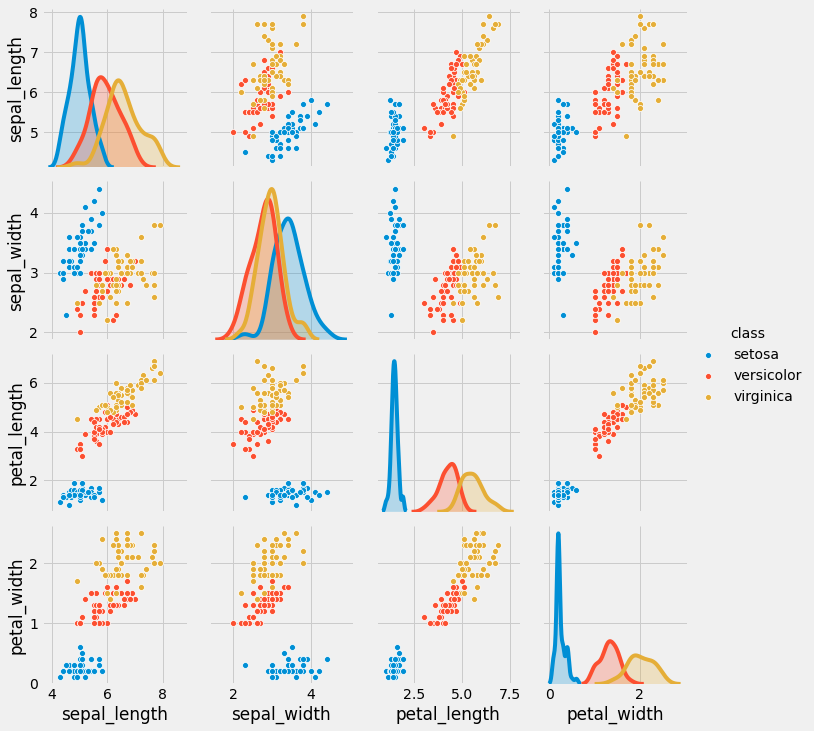

In [23]:
# Load the seaborn package.
import seaborn as sns

# Plot the Iris data set with a pair plot.
sns.pairplot(df, hue="class")

## Inputs and outputs

In [19]:
# Inputs and outputs
inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['class']

In [22]:
# Classifier
knn = nei.KNeighborsClassifier(n_neighbors=5)



https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

### Read article

In [24]:
# Fit
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [27]:
# Predict
df.loc[121]

sepal_length          5.6
sepal_width           2.8
petal_length          4.9
petal_width             2
class           virginica
Name: 121, dtype: object

In [28]:
knn.predict([[5.6, 2.8, 4.9, 2.0], [4.0, 2.0, 1.0, 4.0]])

array(['virginica', 'versicolor'], dtype=object)

In [29]:
# Evaluate
(knn.predict(inputs) == outputs).sum()


145

In [30]:
knn.predict(inputs)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

In [31]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [32]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [33]:
(knn.predict(inputs_test) == outputs_test).sum()


49

Notes:

Revisit Programming for data analysis Lecture. Understand whats going on here. 